In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import arff
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.io import arff

In [4]:
bitcoin_db_path = '../BitcoinHeist_Ransomware/dataset.arff'
bitcoin_data = arff.load(open(bitcoin_db_path,'r'))

KeyboardInterrupt: 

In [ ]:
# bitcoin_data['attributes']

In [ ]:
bitcoin_columns = [c[0] for c in bitcoin_data['attributes']]
bitcoin_columns

In [ ]:
bitcoin_df = pd.DataFrame(bitcoin_data['data'], columns=bitcoin_columns)
bitcoin_df.shape

## Exploring dataset

In [ ]:
# y_labels = bitcoin_df['label'] == 'white'
# bitcoin_df['y'] = y_labels.astype('int')

In [11]:
bitcoin_df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000,princetonLocky


In [8]:
len(bitcoin_df['address'].unique())

2631095

In [9]:
len(bitcoin_df['year'].unique()), bitcoin_df['year'].unique()

(8, array([2017, 2016, 2013, 2014, 2015, 2012, 2011, 2018], dtype=int64))

<AxesSubplot:xlabel='year', ylabel='label'>

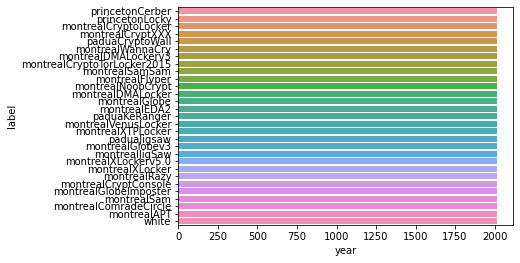

In [10]:
sns.displot(data = bitcoin_df, x='year')
# sns.barplot(data = bitcoin_df, x='year', y='label')

In [11]:
# bitcoin_df['year'].plot.bar()

In [2]:
grpby_label = bitcoin_df.groupby('label')
grpby_label.describe()

NameError: name 'bitcoin_df' is not defined

In [26]:
bitcoin_df['day'].describe()

count    2.916697e+06
mean     1.814572e+02
std      1.040118e+02
min      1.000000e+00
25%      9.200000e+01
50%      1.810000e+02
75%      2.710000e+02
max      3.650000e+02
Name: day, dtype: float64

In [33]:
# sns.barplot(data = bitcoin_df['day'])

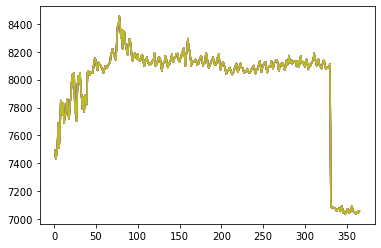

In [32]:
x = bitcoin_df.groupby('day')
plt.plot(x.count())

In [12]:
# bitcoin_df.groupby('ne')

In [34]:
bitcoin_df['count'].describe()

count    2.916697e+06
mean     7.216446e+02
std      1.689676e+03
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      5.600000e+01
max      1.449700e+04
Name: count, dtype: float64

In [35]:
bitcoin_df['length'].describe()

count    2.916697e+06
mean     4.500859e+01
std      5.898236e+01
min      0.000000e+00
25%      2.000000e+00
50%      8.000000e+00
75%      1.080000e+02
max      1.440000e+02
Name: length, dtype: float64

<AxesSubplot:xlabel='length', ylabel='Count'>

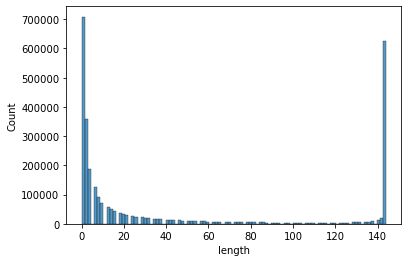

In [38]:
sns.histplot(bitcoin_df['length'])

In [36]:
bitcoin_df['looped'].describe()

count    2.916697e+06
mean     2.385067e+02
std      9.663217e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.449600e+04
Name: looped, dtype: float64

<AxesSubplot:xlabel='looped', ylabel='Count'>

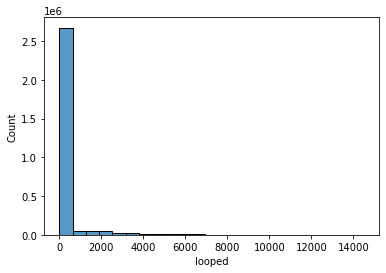

In [37]:
sns.histplot(bitcoin_df['looped'])

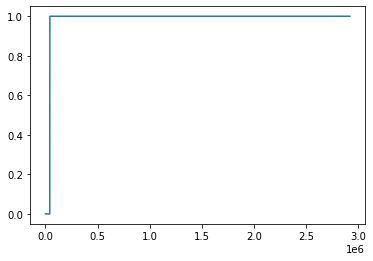

In [51]:
plt.plot(bitcoin_df['label'] == 'white')

In [39]:
bitcoin_df['label'].unique(), len(bitcoin_df['label'].unique())

(array(['princetonCerber', 'princetonLocky', 'montrealCryptoLocker',
        'montrealCryptXXX', 'paduaCryptoWall', 'montrealWannaCry',
        'montrealDMALockerv3', 'montrealCryptoTorLocker2015',
        'montrealSamSam', 'montrealFlyper', 'montrealNoobCrypt',
        'montrealDMALocker', 'montrealGlobe', 'montrealEDA2',
        'paduaKeRanger', 'montrealVenusLocker', 'montrealXTPLocker',
        'paduaJigsaw', 'montrealGlobev3', 'montrealJigSaw',
        'montrealXLockerv5.0', 'montrealXLocker', 'montrealRazy',
        'montrealCryptConsole', 'montrealGlobeImposter', 'montrealSam',
        'montrealComradeCircle', 'montrealAPT', 'white'], dtype=object),
 29)

In [8]:
# address_set = []
# for i, val in enumerate(bitcoin_df['address']):
#     if  val == '1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU':
#         address_set.append(i)
        
# bitcoin_df['address'][address_set[0]], len(address_set)

## Data pre-processing

In [6]:
## making duplicate row if dataset only has 1 row for given class
label_grp_df = bitcoin_df.groupby('label')
min_label_size = 2
test_size = 0.2
small_sized_labels = []
small_sized_labels_df = pd.DataFrame(columns=bitcoin_df.columns)
# y_df = pd.get_dummies(bitcoin_df.iloc[:,-1])
train_df = pd.DataFrame(columns=bitcoin_df.columns)
test_df = pd.DataFrame(columns=bitcoin_df.columns)

for grp_label, grp in label_grp_df:
    grp_size = len(grp)
    print(grp_label, grp_size)
    if grp_size < min_label_size:
        small_sized_labels.append(grp_label)
        #print(f'grp:{grp}')
        for row in grp.iterrows():
            #print('row',row[1])
            small_sized_labels_df = small_sized_labels_df.append(row[1], ignore_index=True)
            train_df = train_df.append(row[1], ignore_index=True)
            test_df = test_df.append(row[1], ignore_index=True)
    else:
        temp_train, temp_test = train_test_split(grp, test_size=0.2)
        print(f'\t temp_train size:{temp_train.shape}, temp_test size:{temp_test.shape}')
        train_df = pd.concat([train_df, temp_train], ignore_index=True)
        test_df = pd.concat([test_df, temp_test], ignore_index=True)
        
print(f'\nsmall sized labels:{small_sized_labels}')
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)
small_sized_labels_df

montrealAPT 11
	 temp_train size:(8, 10), temp_test size:(3, 10)
montrealComradeCircle 1
montrealCryptConsole 7
	 temp_train size:(5, 10), temp_test size:(2, 10)
montrealCryptXXX 2419
	 temp_train size:(1935, 10), temp_test size:(484, 10)
montrealCryptoLocker 9315
	 temp_train size:(7452, 10), temp_test size:(1863, 10)
montrealCryptoTorLocker2015 55
	 temp_train size:(44, 10), temp_test size:(11, 10)
montrealDMALocker 251
	 temp_train size:(200, 10), temp_test size:(51, 10)
montrealDMALockerv3 354
	 temp_train size:(283, 10), temp_test size:(71, 10)
montrealEDA2 6
	 temp_train size:(4, 10), temp_test size:(2, 10)
montrealFlyper 9
	 temp_train size:(7, 10), temp_test size:(2, 10)
montrealGlobe 32
	 temp_train size:(25, 10), temp_test size:(7, 10)
montrealGlobeImposter 55
	 temp_train size:(44, 10), temp_test size:(11, 10)
montrealGlobev3 34
	 temp_train size:(27, 10), temp_test size:(7, 10)
montrealJigSaw 4
	 temp_train size:(3, 10), temp_test size:(1, 10)
montrealNoobCrypt 483
	 temp_t

,address,year,day,length,weight,count,looped,neighbors,income,label
0,1HssDyDTZj1hVdwhdpF49wLKLPQoCRJB9T,2016,292,144,0.051214,1241,0,2,203320001,montrealComradeCircle
1,1Ha4Y7QegJL2t577XK6nSUdCYAKKQC99sG,2016,271,6,0.062500,1,1,3,2900000000,montrealSam
2,1EEHF6uucK2UNtbwxTyAzZ74wNudApYWQm,2017,144,144,0.412207,4511,0,1,100000000,montrealXLocker


In [7]:
train_df.groupby('label')['label'].count(), len(train_df.groupby('label')['label'].count())

(label
 montrealAPT                          8
 montrealComradeCircle                1
 montrealCryptConsole                 5
 montrealCryptXXX                  1935
 montrealCryptoLocker              7452
 montrealCryptoTorLocker2015         44
 montrealDMALocker                  200
 montrealDMALockerv3                283
 montrealEDA2                         4
 montrealFlyper                       7
 montrealGlobe                       25
 montrealGlobeImposter               44
 montrealGlobev3                     27
 montrealJigSaw                       3
 montrealNoobCrypt                  386
 montrealRazy                        10
 montrealSam                          1
 montrealSamSam                      49
 montrealVenusLocker                  5
 montrealWannaCry                    22
 montrealXLocker                      1
 montrealXLockerv5.0                  5
 montrealXTPLocker                    6
 paduaCryptoWall                   9912
 paduaJigsaw                     

In [8]:
test_df.groupby('label')['label'].count(), len(test_df.groupby('label')['label'].count())

(label
 montrealAPT                         3
 montrealComradeCircle               1
 montrealCryptConsole                2
 montrealCryptXXX                  484
 montrealCryptoLocker             1863
 montrealCryptoTorLocker2015        11
 montrealDMALocker                  51
 montrealDMALockerv3                71
 montrealEDA2                        2
 montrealFlyper                      2
 montrealGlobe                       7
 montrealGlobeImposter              11
 montrealGlobev3                     7
 montrealJigSaw                      1
 montrealNoobCrypt                  97
 montrealRazy                        3
 montrealSam                         1
 montrealSamSam                     13
 montrealVenusLocker                 2
 montrealWannaCry                    6
 montrealXLocker                     1
 montrealXLockerv5.0                 2
 montrealXTPLocker                   2
 paduaCryptoWall                  2478
 paduaJigsaw                         1
 paduaKeRanger    

In [109]:
## concat these copy to main dataset
# bitcoin_df = pd.concat([bitcoin_df, small_sized_labels_df], ignore_index=True)
# bitcoin_df.tail()

In [90]:
# from skmultilearn.model_selection import iterative_train_test_split

# X = bitcoin_df.iloc[:, 1:9].values
# # X = bitcoin_df.iloc[:, 1:9]
# y = pd.get_dummies(bitcoin_df.iloc[:,-1]).values
# # y = pd.get_dummies(bitcoin_df.iloc[:,-1])

# X_train, X_test, y_train, y_test = iterative_train_test_split(X,y, test_size=0.2)
# print(f'X_train:{X_train.shape}, y_train:{y_train.shape}\nX_test:{X_test.shape}, y_test:{y_test.shape}')

In [125]:
# X = bitcoin_df.iloc[:, 1:9].values
# X = bitcoin_df.iloc[:, 1:9]
# # y = pd.get_dummies(bitcoin_df.iloc[:,-1]).values
# y = pd.get_dummies(bitcoin_df.iloc[:,-1])

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=50)
# print(f'X_train:{X_train.shape}, y_train:{y_train.shape}\nX_test:{X_test.shape}, y_test:{y_test.shape}')

In [9]:
X_train = train_df.iloc[:, 1:9]
y_train = pd.get_dummies(train_df.iloc[:,-1])
X_test = test_df.iloc[:, 1:9]
y_test = pd.get_dummies(test_df.iloc[:,-1])

In [10]:
X_train

,year,day,length,weight,count,looped,neighbors,income
1944913,2014,176,144,8.468647e-06,1093,1093,2,1089790000
1272998,2014,321,0,1.000000e+00,1,0,2,2499000000
1986928,2012,341,0,1.000000e+00,1,0,2,2534008598
195464,2011,315,12,3.125000e-02,1,0,2,250000000
1796371,2011,262,0,5.000000e-01,1,0,1,1206000000
...,...,...,...,...,...,...,...,...
577680,2014,66,144,1.820604e-07,1835,1733,2,33720000
1679906,2015,37,144,3.888440e+00,375,6,1,7500000000
1029772,2015,274,2,5.000000e-01,1,0,1,100000000
444071,2015,61,10,6.250000e-02,1,0,2,51103174


In [11]:
y_train

,montrealAPT,montrealComradeCircle,montrealCryptConsole,montrealCryptXXX,montrealCryptoLocker,montrealCryptoTorLocker2015,montrealDMALocker,montrealDMALockerv3,montrealEDA2,montrealFlyper,...,montrealWannaCry,montrealXLocker,montrealXLockerv5.0,montrealXTPLocker,paduaCryptoWall,paduaJigsaw,paduaKeRanger,princetonCerber,princetonLocky,white
1944913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1272998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1986928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
195464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1796371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1679906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1029772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
444071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
X_test

,year,day,length,weight,count,looped,neighbors,income
327567,2018,239,4,0.250000,1,0,2,87704265
347235,2015,119,8,0.500000,1,0,2,68680000
420873,2011,127,22,0.734863,8,0,10,2540000000
495083,2018,182,12,1.000000,1,0,2,662375007
355884,2012,136,0,0.500000,1,0,1,123714570
...,...,...,...,...,...,...,...,...
503311,2014,254,2,0.750000,2,0,1,659990000
335711,2017,363,60,0.500000,1,0,2,135362977
459231,2017,125,0,1.000000,1,0,1,72063084
336489,2018,58,144,0.074004,6443,0,2,99990000


In [13]:
y_test

,montrealAPT,montrealComradeCircle,montrealCryptConsole,montrealCryptXXX,montrealCryptoLocker,montrealCryptoTorLocker2015,montrealDMALocker,montrealDMALockerv3,montrealEDA2,montrealFlyper,...,montrealWannaCry,montrealXLocker,montrealXLockerv5.0,montrealXTPLocker,paduaCryptoWall,paduaJigsaw,paduaKeRanger,princetonCerber,princetonLocky,white
327567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
347235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
420873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
495083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
355884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
335711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
459231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
336489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
clf = RandomForestClassifier(n_estimators=20, max_depth=20, random_state=0)

In [16]:
%%time
clf.fit(X_train, y_train)

Wall time: 6min 43s


RandomForestClassifier(max_depth=20, n_estimators=20, random_state=0)

In [17]:
%%time
y_train_pred = clf.predict(X_train)
accuracy_score(y_train, y_train_pred)

Wall time: 1min 23s


0.9901703517133528

In [18]:
%%time
y_test_pred = clf.predict(X_test)
accuracy_score(y_test, y_test_pred)

Wall time: 21.2 s


0.9876060896441422

In [25]:
np.sum(y_test_pred, axis=0)

array([     0,      0,      0,    254,    138,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,    239,
            0,      0,    341,    498, 581766], dtype=uint32)

In [39]:
y_test_linear = [row[1].argmax() for row in y_test.iterrows()]
y_train_linear = [row[1].argmax() for row in y_train.iterrows()]
y_test_linear[:20]

[28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28]

In [40]:
y_test_pred_linear = [row.argmax() for row in y_test_pred]
y_train_pred_linear = [row.argmax() for row in y_train_pred]
y_test_pred_linear

[28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 27,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,


In [42]:
train_cnf_matrix = confusion_matrix(y_train_linear, y_train_pred_linear)

In [43]:
test_conf_matrix = confusion_matrix(y_test_linear, y_test_pred_linear)

Text(0.5, 1.0, 'Log Correlation matrix')

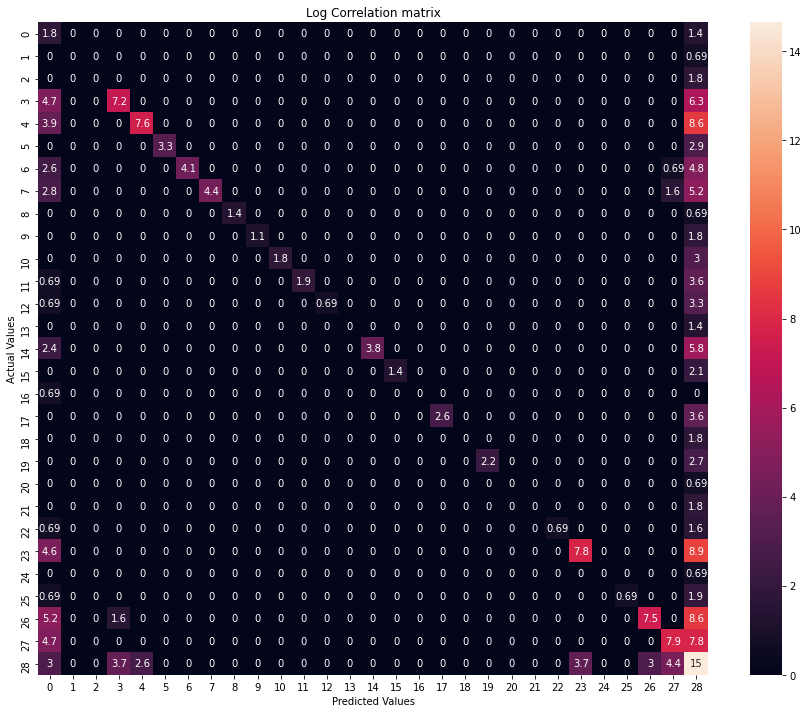

In [62]:
plt.figure(figsize=(15,12))
train_cnf_df = pd.DataFrame(train_cnf_matrix, index= range(29), columns=range(29))
sns.heatmap(np.log(train_cnf_df+1), annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title("Log Correlation matrix of train")

Text(0.5, 1.0, 'Log Correlation matrix of test')

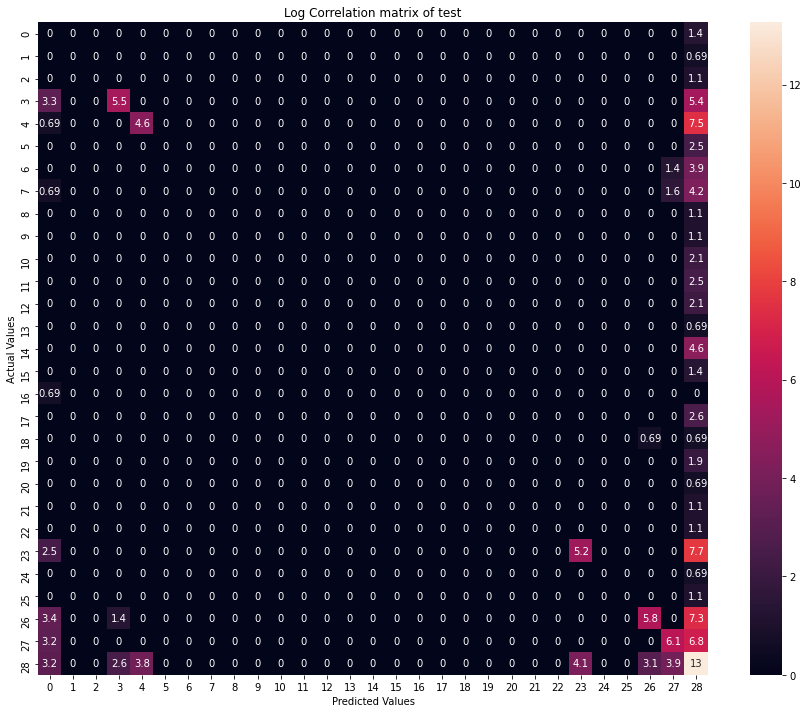

In [63]:
plt.figure(figsize=(15,12))
test_cnf_df = pd.DataFrame(test_conf_matrix, index= range(29), columns=range(29))
sns.heatmap(np.log(test_cnf_df+1), annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title("Log Correlation matrix of test")